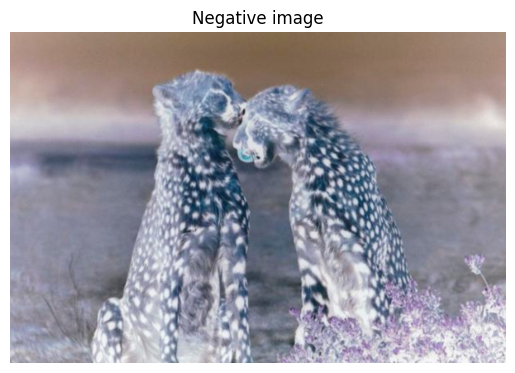

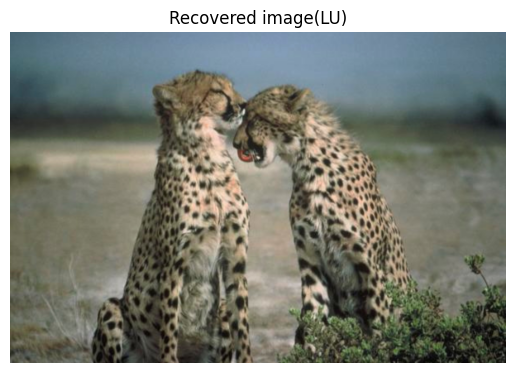

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

def lu_decomposition(A):
    n = len(A)
    L = [[0] * n for _ in range(n)]
    U = [[0] * n for _ in range(n)]

    for i in range(n):
        L[i][i] = 1

        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))

        for j in range(i + 1, n):
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]

    return L, U

def forward_substitution(L, b):
    n = len(L)
    x = [0] * n
    for i in range(n):
        x[i] = (b[i] - sum(L[i][j] * x[j] for j in range(i))) / L[i][i]
    return x

def backward_substitution(U, y):
    n = len(U)
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]
    return x

def inverse_via_lu(A):
    n = len(A)
    L, U = lu_decomposition(A)
    A_inv = []

    for i in range(n):
        e_i = [1 if j == i else 0 for j in range(n)]
        y = forward_substitution(L, e_i)
        x = backward_substitution(U, y)
        A_inv.append(x)

    return [list(row) for row in zip(*A_inv)]

def restore_image(negative_img):
    img = negative_img.astype(np.float32)

    h, w, _ = img.shape
    ones = np.ones((h, w, 1), dtype=np.float32)
    img_homogeneous = np.concatenate((img, ones), axis=2)

    img_reshaped = img_homogeneous.reshape(-1, 4).T
    restored = np.matmul(T_inv, img_reshaped)

    restored = restored[:3, :].T.reshape(h, w, 3)
    restored = np.clip(restored, 0, 255).astype(np.uint8)

    return restored

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

T = [
    [-1, 0, 0, 255],
    [0, -1, 0, 255],
    [0, 0, -1, 255],
    [0, 0, 0, 1]
]

T_inv = inverse_via_lu(T)
T_inv = np.array(T_inv)

input_path = 'negative.png'
negative_img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

if negative_img is None:
    print("Помилка: не вдалося завантажити зображення.")
else:
    if negative_img.shape[2] == 4:
        negative_img = negative_img[:, :, :3]

    show_image(negative_img, "Negative image")

    restored_img = restore_image(negative_img)

    show_image(restored_img, "Recovered image(LU)")

    output_path = 'restored_image.png'
    cv2.imwrite(output_path, restored_img)
